## Data Requirements

We want to know the rain measurements from a recent period of time. We can check multiple data sources, however since KNMI is the most trusted data source, we will for now look at this data source only. 

#### KNMI
Also Koninklijk Nederlands Meteorologisch Instituut or Royal Dutch Meteorological Institute is a Dutch national weather service. The main task of KNMI is to forecast weather and to monitor the weather, climate, air quality and seismic activity (related to earthquakes). With the knowledge they have, they try to reduce risks in the field of weather, climate and seismology and try to limit damage and injuries.

We expect to have a datapoint for each day, we don't want to have any missing values. <br>
As we want to check how much it rained on days within the period 01-01-2018 until 27-05-2022, we would need features such as precipitation and date. Besides that we do not really need any other features.

KNMI receives the data from the measure stations and weather stations throughout the country. They share the data, to give advice to others. In extreme cases, such as storms, it is important to stay up to date so people will stay safe. For example, they work together with ProRail, a company that is responsible for the maintenance, renewal, expansion and safety of the Dutch railway network. In case severe weather is predicted, they will decide to change timetable for trains.
Waarom heeft KNMI die data, waarom zouden zij die data geven. zij zijn een instituut die hier op focust.

## Data Collection

We are going to look at the rain measurements from January 1st 2018 until May 27th 2022. We want to find out if the rain has an affect on the traffic jams and roadworks. The data we are looking at is from <a href="https://daggegevens.knmi.nl/">KNMI</a>. For now we will only look at the weather station in Eindhoven. Since we look at the rain we chose RHX and RHXH. 

If there is enough time, we will also look at traffic jams and check if there is correlation between the rain measurements and the traffic jams. The data for traffic jams is in another file.

## Data Understanding

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We chose for now only Eindhoven. The number of the weather station is 370. We skipped the first 9 rows, since these rows are not useful as they are just explaining what each column stands for and some other comments. 

In [2]:
rain = pd.read_excel("Rain measurements.xlsx", skiprows = 9)
rain

,# STN,YYYYMMDD,RHX,RHXH
0,370,20180101,21,16
1,370,20180102,10,5
2,370,20180103,37,4
3,370,20180104,5,15
4,370,20180105,10,4
...,...,...,...,...
1603,370,20220523,83,17
1604,370,20220524,31,13
1605,370,20220525,-1,1
1606,370,20220526,0,1


In [3]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   # STN     1608 non-null   int64
 1   YYYYMMDD  1608 non-null   int64
 2     RHX     1608 non-null   int64
 3    RHXH     1608 non-null   int64
dtypes: int64(4)
memory usage: 50.4 KB


The names of the columns have spaces in front, so this needs to be fixed for sure. But since the names are not really understandable, we will also change the names.

In [4]:
rain ['# STN'].unique()

array([370], dtype=int64)

As predicted the only value is 370, since we only look at the weather station in Eindhoven. We will change this to categorical because then the only value could be 370 or null, when a new row is added.

In [5]:
rain[rain['YYYYMMDD'].duplicated() == True]

,# STN,YYYYMMDD,RHX,RHXH


We want to know if the date column has any duplicate values, when checking there are no duplicate values. This means there is no date duplicate in the dataframe and since there are no missing values, we know that the dates range from 01-01-2018 until 27-05-2022.

In [6]:
rain['  RHX'].unique()

array([ 21,  10,  37,   5,   4,   0,  -1,   9,  28,  24,  20,  22,   6,
        12,  33,   3,  16, 105,  17,   8,   2,  13,  14,  18,  11,  26,
        15,   1, 101,  46,  72,  53, 141,  74,  57,  39,  34,  29,  54,
         7,  58,  35,  85,  30,  38,  36,  23,  25,  89,  65, 120, 124,
        77,  27,  31,  48,  69,  19,  56,  59, 102,  40,  61, 126, 178,
        52,  97,  32,  43,  42, 167,  55,  45,  88,  49, 136, 153, 158,
        41,  50,  51,  83], dtype=int64)

In [7]:
rain[' RHXH'].unique()

array([16,  5,  4, 15, 14,  1,  8, 21, 10, 23, 13, 22,  3, 18, 11, 12, 19,
       20,  6, 17,  2,  7, 24,  9], dtype=int64)

These values are only hours. This could be categorical, since these values occur multiple times. There cannot be any other values than 1-24, since these are the only hours in a day.
Since we are only interested in the working times, we will replace all values of precipitation to 0, for the times after 18.00 (6 PM) and before 8.00 (8 AM). We will not remove these rows, since this might cause problems later.

There are 4 columns with in total 1608 rows. We chose the dates ourselves so we could extend the dataset even more, if we want to we can extend it. 

<b>#STN</b><br>
Stands for the weather station number. This should be 370 for each row, since we only look at Eindhoven. <br>
Datatype is int64 - change to category<br>
1608 non-null values<br>

<b>YYYYMMDD</b><br>
The day the rain was measured.<br>
Datatype is int64 - change to datetime<br>
1608 non-null values<br>

<b>RHX</b><br>
Maximum hourly precipitation amount (in 0.1 mm). If a value in the column is -1, this means there was less than 0.05mm percipitation.<br>
Datatype is int64<br>
1608 non-null values<br>

<b>RHXH</b><br>
Hourly division in which the maximum hourly precipitation is measured.<br>
Datatype is int64<br>
1608 non-null values

In [8]:
rain.describe()

,# STN,YYYYMMDD,RHX,RHXH
count,1608.0,1.608000e+03,1608.000000,1608.000000
mean,370.0,2.019792e+07,7.703358,6.269900
std,0.0,1.281200e+04,17.348715,7.409981
min,370.0,2.018010e+07,-1.000000,1.000000
25%,370.0,2.019021e+07,0.000000,1.000000
50%,370.0,2.020031e+07,0.000000,1.000000
75%,370.0,2.021042e+07,9.000000,12.000000
max,370.0,2.022053e+07,178.000000,24.000000


In [9]:
rain[rain['  RHX'] == 178]

,# STN,YYYYMMDD,RHX,RHXH
898,370,20200617,178,17


We checked <a href="https://weerstatistieken.nl/eindhoven/2020/juni">Weerstatistieken</a> to double check if the data is the same, this is exactly true. However, they used the data from KNMI, so this is unfortunately not as useful as hoped.

In [10]:
# datetime as index (to filter on worktimes)

In [11]:
year_2018 = rain[(rain['YYYYMMDD'] >= 20181231)]
year_2019 = rain[(rain['YYYYMMDD'] >= 20190101) & (rain['YYYYMMDD'] <= 20191231)]
year_2020 = rain[(rain['YYYYMMDD'] >= 20200101) & (rain['YYYYMMDD'] <= 20201231)]
year_2021 = rain[(rain['YYYYMMDD'] >= 20210101) & (rain['YYYYMMDD'] <= 20211231)]
year_2022 = rain[(rain['YYYYMMDD'] >= 20220101)]

We created new dataframes for each year, so that it is easier to check data per year. This way we can also check if there are similarities per year.

<AxesSubplot:xlabel='YYYYMMDD'>

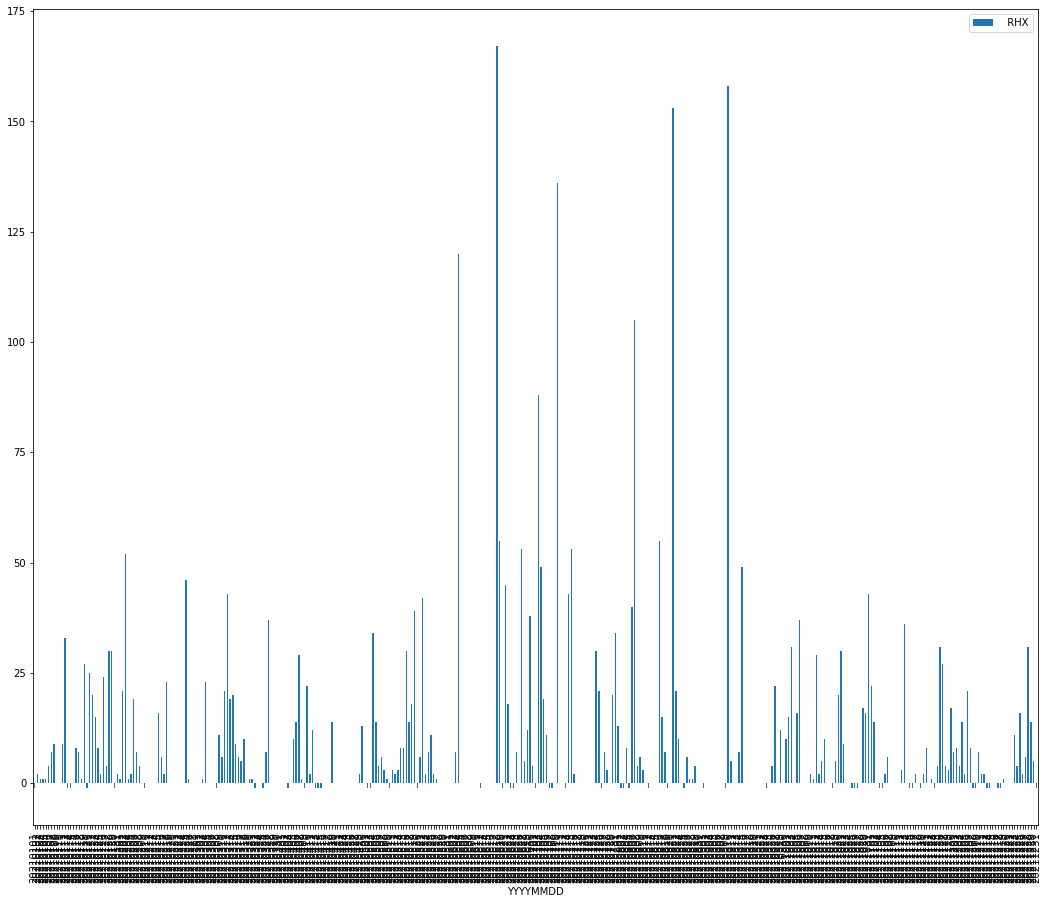

In [12]:
year_2021.plot.bar(x='YYYYMMDD', y='  RHX', figsize=(18,15))

Since the dataframe is filtered on each year, it is better visible. But we still cannot see the dates, so we filter again into periods of 4 months. It is best to check the data from 2021, since that is where we have the most data with Traffic Jams.

In [13]:
jan_apr_2021 = year_2021[(year_2021['YYYYMMDD'] >= 20210101) & (year_2021['YYYYMMDD'] <= 20210430)]
may_aug_2021 = year_2021[(year_2021['YYYYMMDD'] >= 20210501) & (year_2021['YYYYMMDD'] <= 20210831)]
sep_dec_2021 = year_2021[(year_2021['YYYYMMDD'] >= 20210901) & (year_2021['YYYYMMDD'] <= 20211231)]

Text(0.5, 0, 'Date')

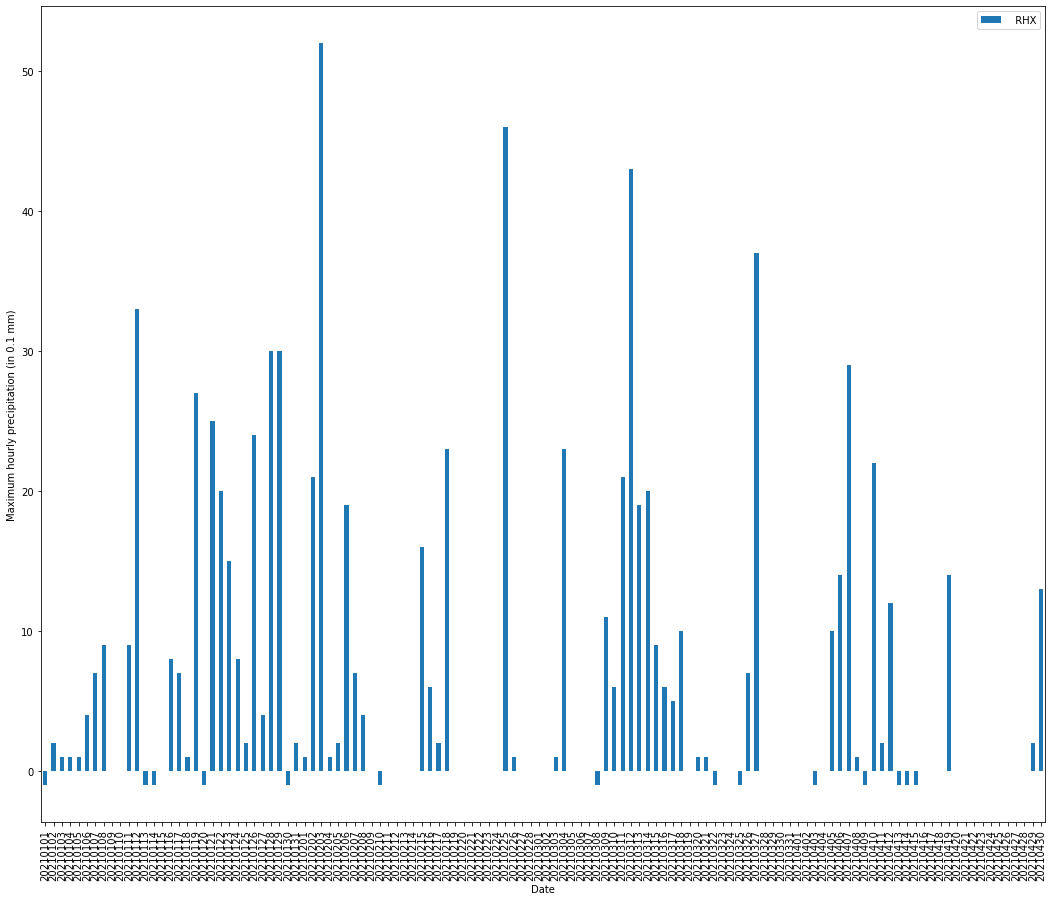

In [14]:
jan_apr_2021.plot.bar(x='YYYYMMDD', y='  RHX', figsize=(18,15))
plt.ylabel('Maximum hourly precipitation (in 0.1 mm)')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

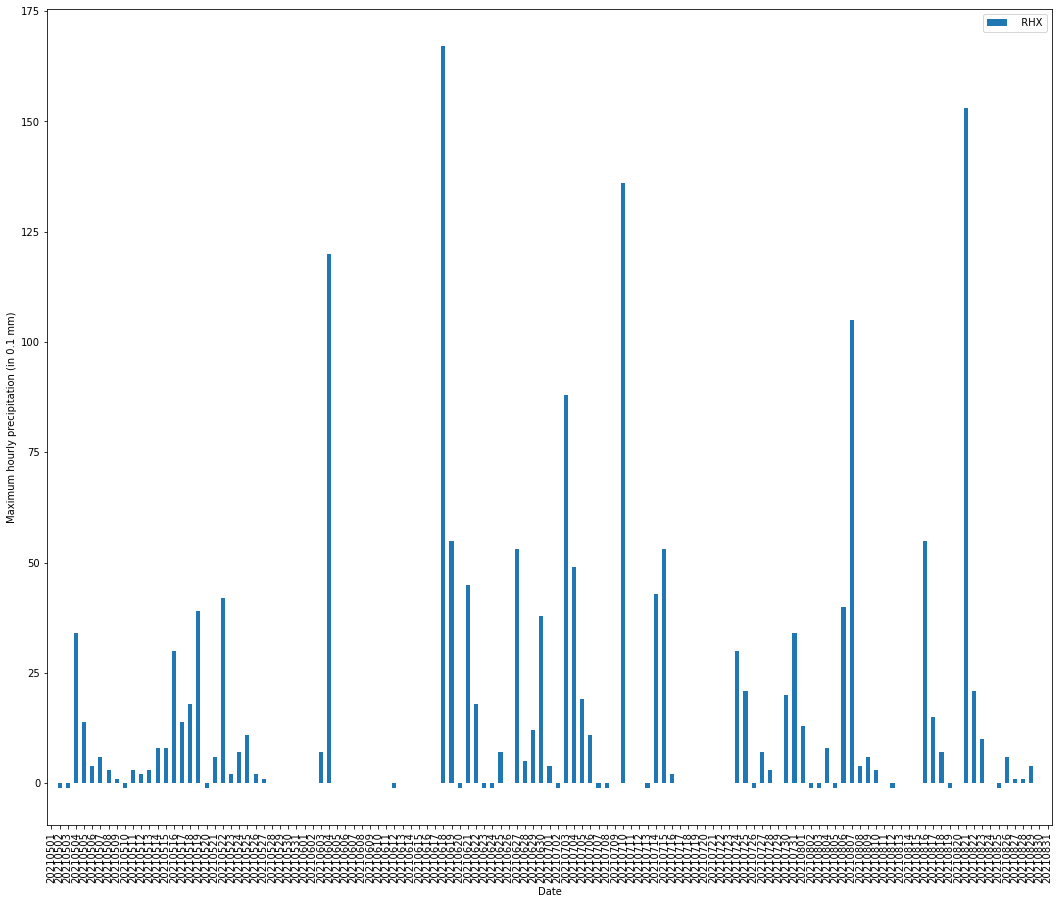

In [15]:
may_aug_2021.plot.bar(x='YYYYMMDD', y='  RHX', figsize=(18,15))
plt.ylabel('Maximum hourly precipitation (in 0.1 mm)')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

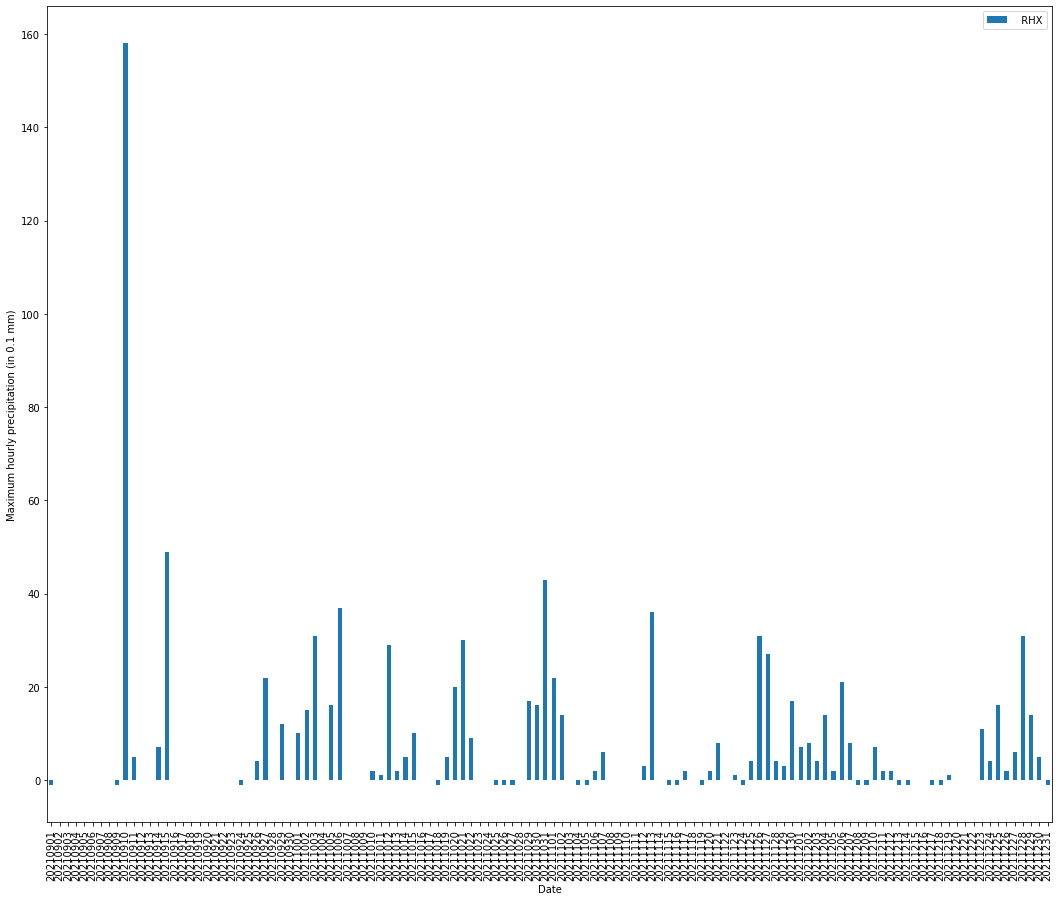

In [16]:
sep_dec_2021.plot.bar(x='YYYYMMDD', y='  RHX', figsize=(18,15))
plt.ylabel('Maximum hourly precipitation (in 0.1 mm)')
plt.xlabel('Date')

--

In [17]:
rain[' RHXH'].value_counts()

1     909
17     45
14     39
3      36
13     35
24     35
16     34
12     33
5      31
18     31
21     31
22     30
2      30
7      30
11     28
10     28
15     28
9      28
19     27
23     26
4      26
8      24
6      23
20     21
Name:  RHXH, dtype: int64

We will later on change the RHX values from 19.00 (7.00 PM) until 7.00 (7 AM), so the value counts for a lot of values will change. 

## Data Preparation

Since the RHX is counted in 0.1mm, we multiply it by 10 to get value to 1 mm<br>
The column names might be confusing, so we change them<br>

In [18]:
rain = rain.rename(columns={"# STN": "Weatherstation", "YYYYMMDD": "Date", "  RHX": "Max hourly precipitation", " RHXH": "Hour of max precipitation"})
rain

,Weatherstation,Date,Max hourly precipitation,Hour of max precipitation
0,370,20180101,21,16
1,370,20180102,10,5
2,370,20180103,37,4
3,370,20180104,5,15
4,370,20180105,10,4
...,...,...,...,...
1603,370,20220523,83,17
1604,370,20220524,31,13
1605,370,20220525,-1,1
1606,370,20220526,0,1


In [19]:
#rain = rain.astype({"Weatherstation" : "category", "Hour of max precipitation" : "category"})
rain['Date'] = rain['Date'].apply([lambda x: pd.to_datetime(f"{x}"[:4] + "-" + f"{x}"[4:6] + "-" + f"{x}"[6:], format='%Y-%m-%d')])
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Weatherstation             1608 non-null   int64         
 1   Date                       1608 non-null   datetime64[ns]
 2   Max hourly precipitation   1608 non-null   int64         
 3   Hour of max precipitation  1608 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 50.4 KB


In [20]:
rain

,Weatherstation,Date,Max hourly precipitation,Hour of max precipitation
0,370,2018-01-01,21,16
1,370,2018-01-02,10,5
2,370,2018-01-03,37,4
3,370,2018-01-04,5,15
4,370,2018-01-05,10,4
...,...,...,...,...
1603,370,2022-05-23,83,17
1604,370,2022-05-24,31,13
1605,370,2022-05-25,-1,1
1606,370,2022-05-26,0,1


In [21]:
rain['Max hourly precipitation'] = 10 * rain['Max hourly precipitation']
rain

,Weatherstation,Date,Max hourly precipitation,Hour of max precipitation
0,370,2018-01-01,210,16
1,370,2018-01-02,100,5
2,370,2018-01-03,370,4
3,370,2018-01-04,50,15
4,370,2018-01-05,100,4
...,...,...,...,...
1603,370,2022-05-23,830,17
1604,370,2022-05-24,310,13
1605,370,2022-05-25,-10,1
1606,370,2022-05-26,0,1


We want to have the Max hourly precipitation in 1 mm instead of 0.1 mm, so we multiply this column by 10. 

In [22]:
non_working_hours = rain[(rain['Hour of max precipitation'] > 18) | (rain['Hour of max precipitation'] < 8)]
non_working_hours

,Weatherstation,Date,Max hourly precipitation,Hour of max precipitation
1,370,2018-01-02,100,5
2,370,2018-01-03,370,4
4,370,2018-01-05,100,4
6,370,2018-01-07,0,1
7,370,2018-01-08,0,1
...,...,...,...,...
1601,370,2022-05-21,0,1
1602,370,2022-05-22,0,1
1605,370,2022-05-25,-10,1
1606,370,2022-05-26,0,1


If we look at only the working hours, we can see there are only 353 rows. So there was a lot of precipitation before and after working hours.

In [23]:
non_working_hours['Hour of max precipitation'].unique()

array([ 5,  4,  1, 21, 23, 22,  3, 19, 20,  6,  2,  7, 24], dtype=int64)

In [24]:
non_working_hours['Max hourly precipitation'] = 0

C:\Users\Sugar\AppData\Local\Temp/ipykernel_16900/3544677719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_working_hours['Max hourly precipitation'] = 0


In [25]:
non_working_hours[non_working_hours['Hour of max precipitation'] == 24]

,Weatherstation,Date,Max hourly precipitation,Hour of max precipitation
111,370,2018-04-22,0,24
118,370,2018-04-29,0,24
128,370,2018-05-09,0,24
218,370,2018-08-07,0,24
221,370,2018-08-10,0,24
301,370,2018-10-29,0,24
348,370,2018-12-15,0,24
364,370,2018-12-31,0,24
380,370,2019-01-16,0,24
390,370,2019-01-26,0,24


In [26]:
working_hours = rain[(rain['Hour of max precipitation'] <= 18) & (rain['Hour of max precipitation'] >= 8)]
working_hours

,Weatherstation,Date,Max hourly precipitation,Hour of max precipitation
0,370,2018-01-01,210,16
3,370,2018-01-04,50,15
5,370,2018-01-06,40,14
9,370,2018-01-10,90,8
15,370,2018-01-16,240,10
...,...,...,...,...
1596,370,2022-05-16,230,11
1599,370,2022-05-19,420,12
1600,370,2022-05-20,150,13
1603,370,2022-05-23,830,17


In [27]:
frames = [working_hours, non_working_hours]
# create copy of base rain df
base_rain = rain.copy()

rain = pd.concat(frames)
rain

,Weatherstation,Date,Max hourly precipitation,Hour of max precipitation
0,370,2018-01-01,210,16
3,370,2018-01-04,50,15
5,370,2018-01-06,40,14
9,370,2018-01-10,90,8
15,370,2018-01-16,240,10
...,...,...,...,...
1601,370,2022-05-21,0,1
1602,370,2022-05-22,0,1
1605,370,2022-05-25,0,1
1606,370,2022-05-26,0,1


In [28]:
rain['Date'] = rain['Date'].sort_values()
rain

# moet nog op datum sorteren, 2018-01-03 staat wel in de dataset, maar is verplaatst.

,Weatherstation,Date,Max hourly precipitation,Hour of max precipitation
0,370,2018-01-01,210,16
3,370,2018-01-04,50,15
5,370,2018-01-06,40,14
9,370,2018-01-10,90,8
15,370,2018-01-16,240,10
...,...,...,...,...
1601,370,2022-05-21,0,1
1602,370,2022-05-22,0,1
1605,370,2022-05-25,0,1
1606,370,2022-05-26,0,1


In [29]:
rain[rain["Date"] == '2018-01-03']

,Weatherstation,Date,Max hourly precipitation,Hour of max precipitation
2,370,2018-01-03,0,4


2018-01-03 is in de dataset, but it is moved somewhere else in the dataset

In [30]:
rain = rain.set_index(rain['Date'], drop = False)
rain

,Weatherstation,Date,Max hourly precipitation,Hour of max precipitation
Date,,,,
2018-01-01,370,2018-01-01,210,16
2018-01-04,370,2018-01-04,50,15
2018-01-06,370,2018-01-06,40,14
2018-01-10,370,2018-01-10,90,8
2018-01-16,370,2018-01-16,240,10
...,...,...,...,...
2022-05-21,370,2022-05-21,0,1
2022-05-22,370,2022-05-22,0,1
2022-05-25,370,2022-05-25,0,1


In [31]:
pd.date_range(start = '2018-01-01', end = '2022-05-27').difference(rain.index)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

# Modelling

In [32]:
rain.index = pd.DatetimeIndex(rain.index).to_period('D')
rain = rain.sort_index()
rain

,Weatherstation,Date,Max hourly precipitation,Hour of max precipitation
Date,,,,
2018-01-01,370,2018-01-01,210,16
2018-01-02,370,2018-01-02,0,5
2018-01-03,370,2018-01-03,0,4
2018-01-04,370,2018-01-04,50,15
2018-01-05,370,2018-01-05,0,4
...,...,...,...,...
2022-05-23,370,2022-05-23,830,17
2022-05-24,370,2022-05-24,310,13
2022-05-25,370,2022-05-25,0,1


In [33]:
import statsmodels
import statsmodels.api as sm
import itertools
import warnings

saim = sm.tsa.statespace.SARIMAX(rain[['Max hourly precipitation']],
                                order=(1,1,1),
                                seasonal_order=(1,1,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
model = saim.fit()

In [34]:
# import statsmodels
# import itertools
# import warnings

# # Function for fitting model and returning the results object
# def FitModel(param):
#     saim = statsmodels.tsa.arima.model.ARIMA(rain[['Max hourly precipitation']],
#                                 order=param,
#                                 enforce_stationarity=False,
#                                 enforce_invertibility=False,
#                                 freq='D')

#     return saim.fit()

In [35]:
# model = FitModel((1,1,1))

C:\Programs\Anaconda\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


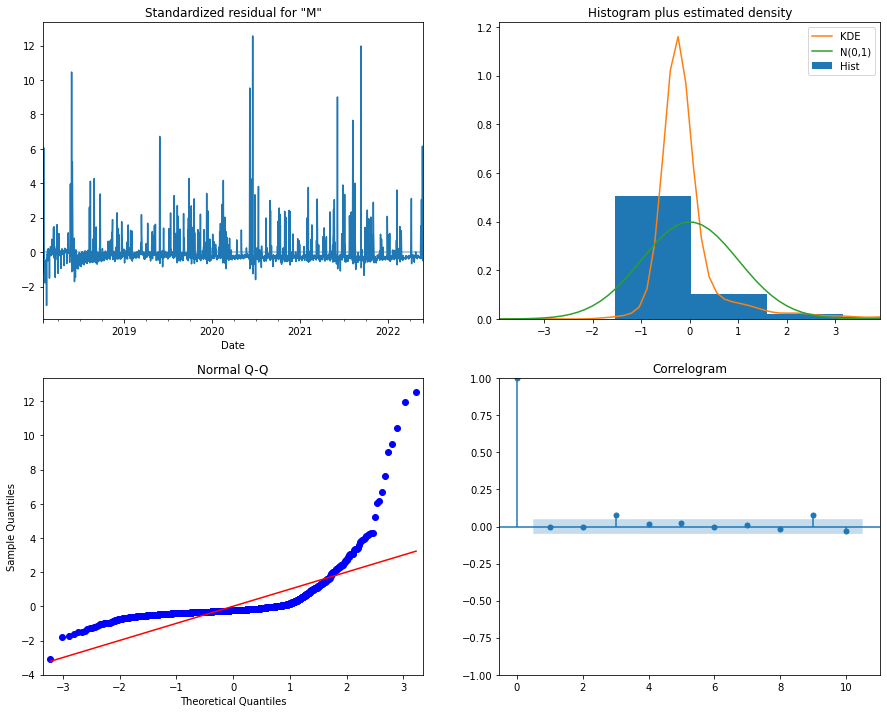

In [36]:
model.plot_diagnostics(figsize=(15, 12))
plt.show()

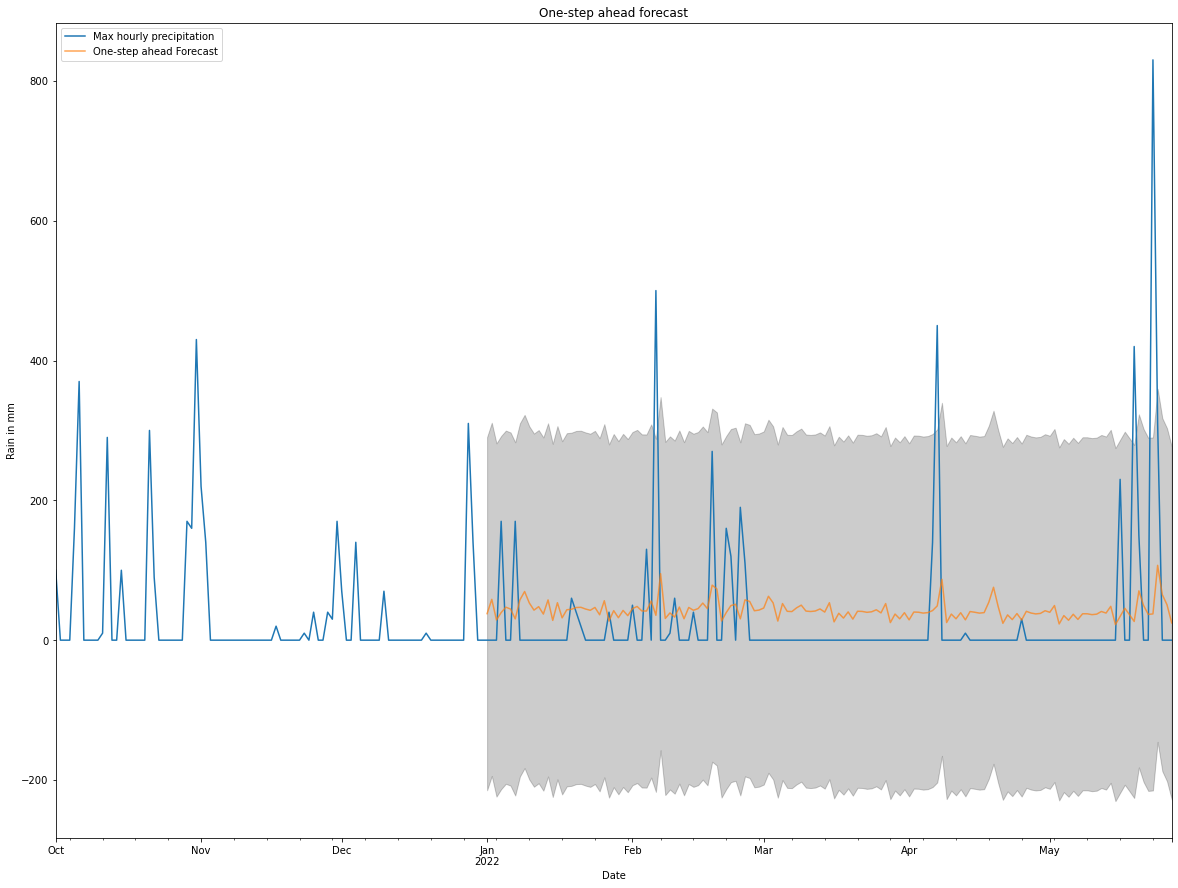

In [38]:
# Create forecast information
pred_date = '2022-01-01'
pred = model.get_prediction(start=pd.to_datetime(pred_date), dynamic=False)
pred_ci = pred.conf_int()

# Show reference data
ax = rain[['Max hourly precipitation']]['2021-10':].plot(label='observed', figsize=(20, 15))
# Show predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
# Show confidence of the model's prediction
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Rain in mm')
ax.set_title('One-step ahead forecast')
plt.legend()

plt.show()

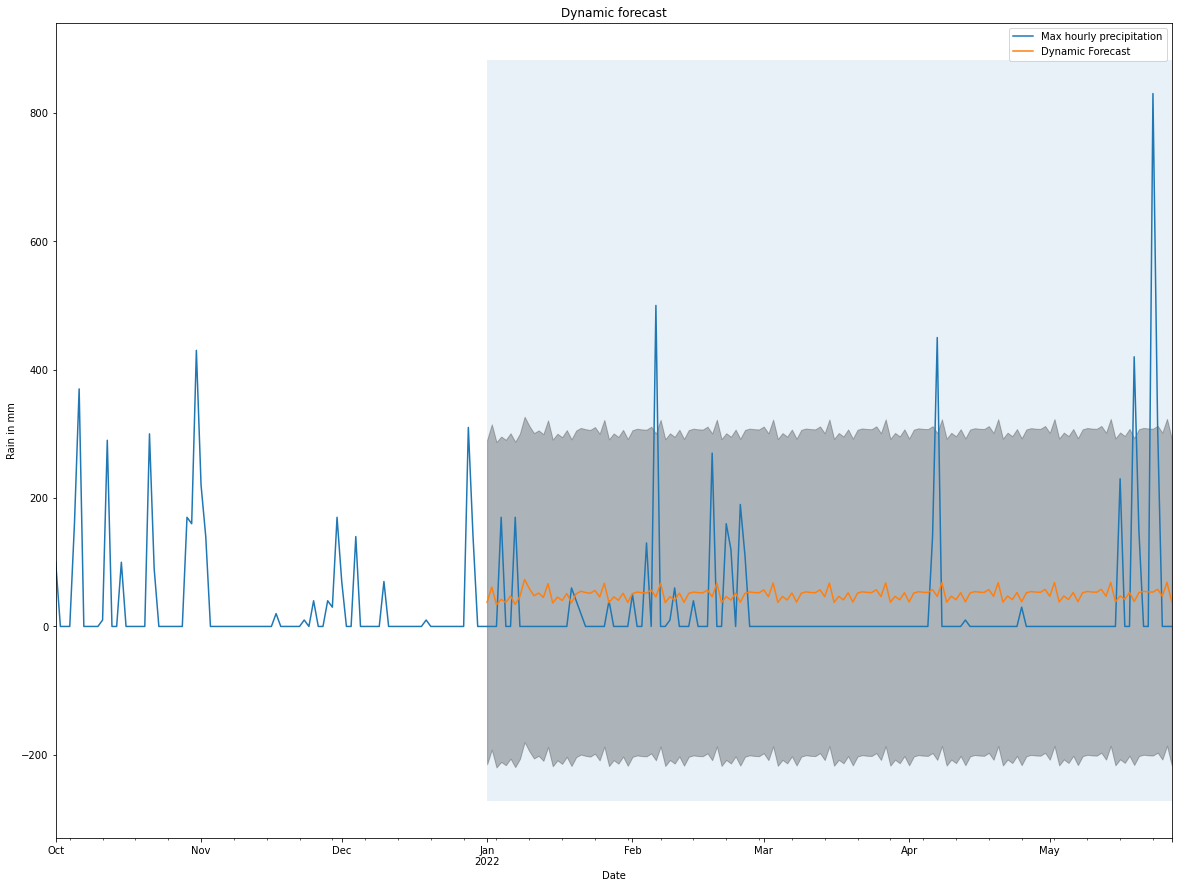

In [39]:
# Create forecast information
pred_date = '2022-01-01'
pred_dynamic = model.get_prediction(start=pd.to_datetime(pred_date), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

# Show reference data
ax = rain[['Max hourly precipitation']]['2021-10':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)
# Show predicted values
ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
# Show confidence of the model's prediction
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime(pred_date), rain[['Max hourly precipitation']].index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Rain in mm')
ax.set_title('Dynamic forecast')

plt.legend()
plt.show()

# With external hours

In [45]:
base_rain.loc[base_rain['Max hourly precipitation'] == -10, 'Max hourly precipitation'] = 0

base_rain = base_rain.set_index(rain['Date'], drop = False)
base_rain.index = pd.DatetimeIndex(base_rain.index).to_period('D')
base_rain = base_rain.sort_index()
base_rain

,Weatherstation,Date,Max hourly precipitation,Hour of max precipitation
Date,,,,
2018-01-01,370,2018-01-01,210,16
2018-01-02,370,2018-01-02,100,5
2018-01-03,370,2018-01-03,370,4
2018-01-04,370,2018-01-04,50,15
2018-01-05,370,2018-01-05,100,4
...,...,...,...,...
2022-05-23,370,2022-05-23,830,17
2022-05-24,370,2022-05-24,310,13
2022-05-25,370,2022-05-25,0,1


In [46]:
import statsmodels
import statsmodels.api as sm
import itertools
import warnings

saim = sm.tsa.statespace.SARIMAX(base_rain[['Max hourly precipitation']],
                                order=(1,1,1),
                                seasonal_order=(1,1,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
model = saim.fit()

C:\Programs\Anaconda\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


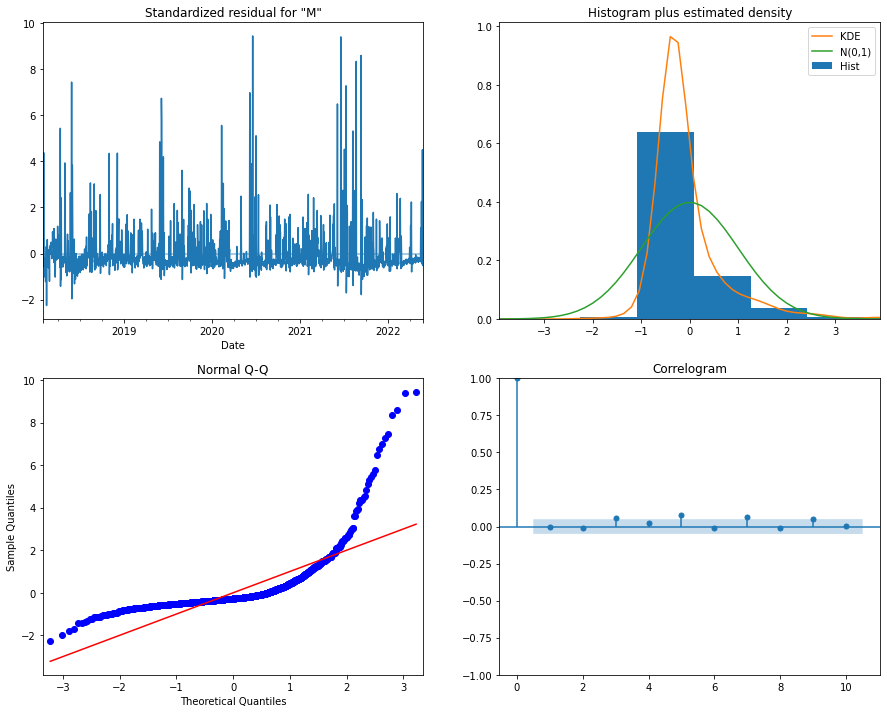

In [47]:
model.plot_diagnostics(figsize=(15, 12))
plt.show()

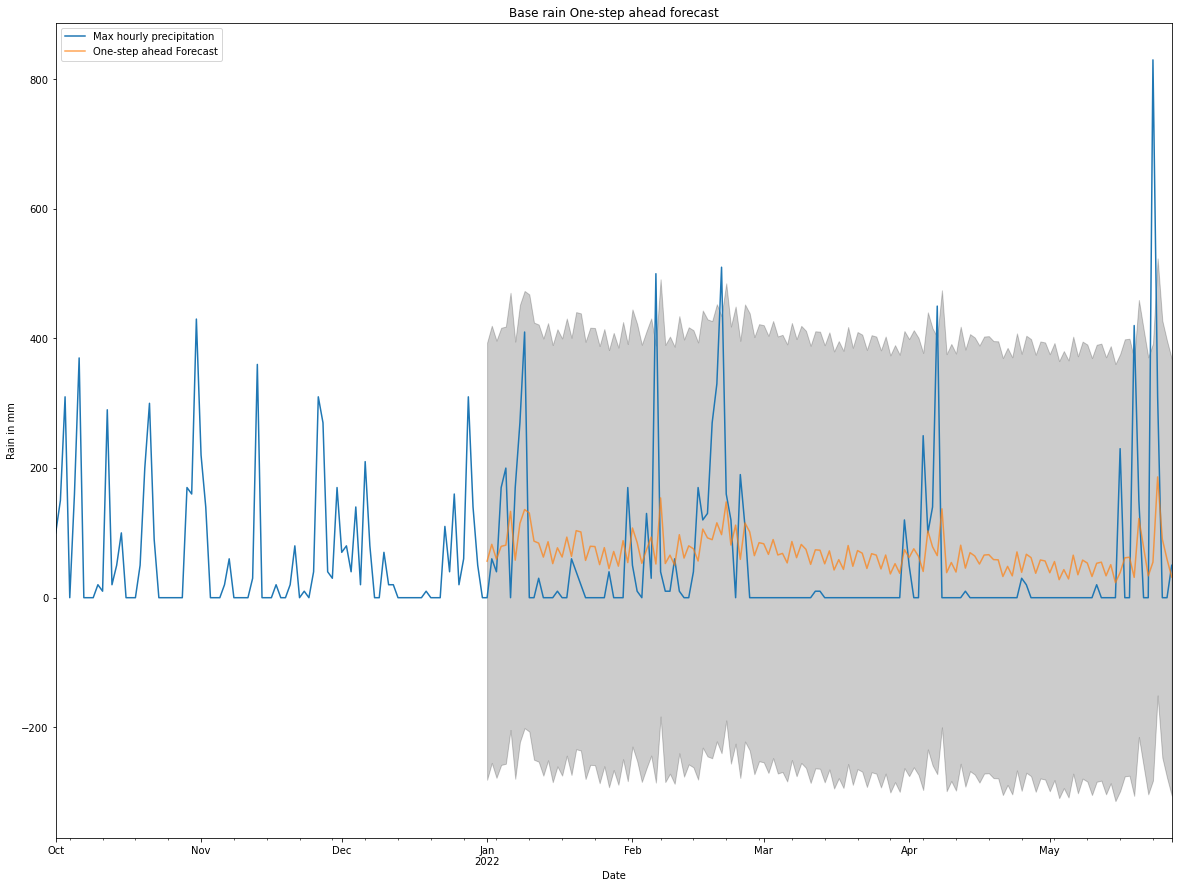

In [48]:
# Create forecast information
pred_date = '2022-01-01'
pred = model.get_prediction(start=pd.to_datetime(pred_date), dynamic=False)
pred_ci = pred.conf_int()

# Show reference data
ax = base_rain[['Max hourly precipitation']]['2021-10':].plot(label='observed', figsize=(20, 15))
# Show predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
# Show confidence of the model's prediction
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Rain in mm')
ax.set_title('Base rain One-step ahead forecast')
plt.legend()

plt.show()

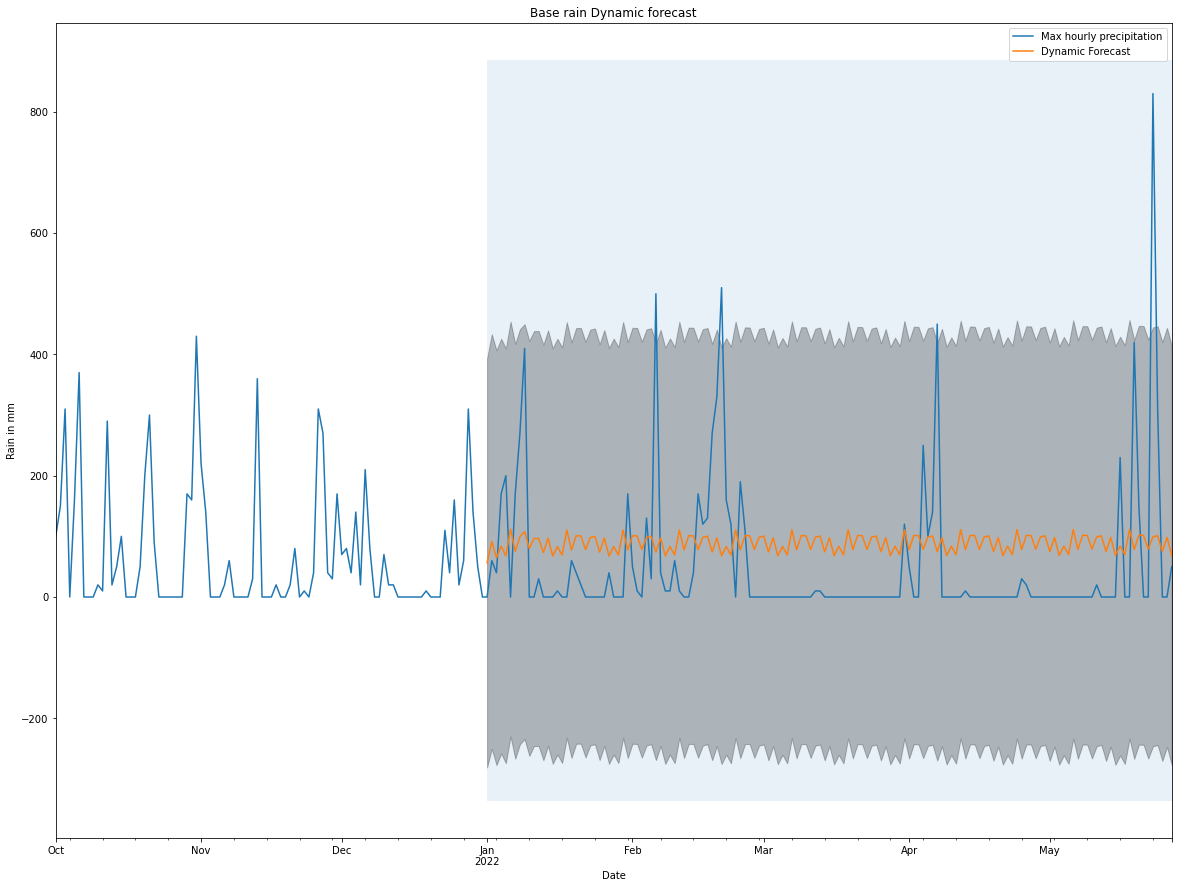

In [49]:
# Create forecast information
pred_date = '2022-01-01'
pred_dynamic = model.get_prediction(start=pd.to_datetime(pred_date), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

# Show reference data
ax = base_rain[['Max hourly precipitation']]['2021-10':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)
# Show predicted values
ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
# Show confidence of the model's prediction
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime(pred_date), base_rain[['Max hourly precipitation']].index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Rain in mm')
ax.set_title('Base rain Dynamic forecast')

plt.legend()
plt.show()